In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import scipy

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

%matplotlib inline
import numpy as np
from IPython.core.pylabtools import figsize
import matplotlib.pyplot as plt
import scipy.stats as stats
import matplotlib
import matplotlib.animation as animation
import seaborn as sns

# Any results you write to the current directory are saved as output.

In [2]:
real_probs_dict = {'R':0.8,'G':0.4,'B':0.3}
assets = ['R','G','B']

Strategy:
We will sample a random variable from each of the 3 distributions for assets.

We will find out which random variable is maximum and will show the one asset which gave the maximum random variable.

We will get to know if that asset is clicked or not

We will update the prior for the asset using the information in step 3.

Repeat from Step 1

In [3]:
'''
This function takes as input three tuples for alpha,beta that specify priorR,priorG,priorB 
And returns R,G,B along with the maximum value sampled from these three distributions.
We can sample from a beta distribution using 
'''

def find_asset(priorR,priorG,priorB):    
    red_rv = scipy.stats.beta.rvs(priorR[0],priorR[1])
    green_rv = scipy.stats.beta.rvs(priorG[0],priorG[1])
    blue_rv = scipy.stats.beta.rvs(priorB[0],priorB[1])
    return assets[np.argmax([red_rv,green_rv,blue_rv])]
    
'''
This is a helper function that simulates the real world using the actual probability value of the assets.
In real life we won't have this function and our user click input will be the proxy for this function.
'''
def simulate_real_website(asset, real_probs_dict):
    #simulate a coin toss with probability. Asset clicked or not.
    if real_probs_dict[asset]> scipy.stats.uniform.rvs(0,1):
        return 1
    else:
        return 0

'''
This function takes as input the selected asset and returns the updated posteriors for the selected asset.
'''
def update_posterior(asset,priorR,priorG,priorB,outcome):
    if asset=='R':
        priorR=(priorR[0]+outcome,priorR[1]+1-outcome)
    elif asset=='G':
        priorG=(priorG[0]+outcome,priorG[1]+1-outcome)
    elif asset=='B':
        priorB=(priorB[0]+outcome,priorB[1]+1-outcome)
    return priorR,priorG,priorB

'''
This function runs the strategy once.
'''
def run_strategy_once(priorR,priorG,priorB):
    # 1. get the asset
    asset = find_asset(priorR,priorG,priorB)
    # 2. get the outcome from the website
    outcome = simulate_real_website(asset, real_probs_dict)
    # 3. update posterior
    priorR,priorG,priorB = update_posterior(asset,priorR,priorG,priorB,outcome)
    return asset,priorR,priorG,priorB

In [4]:
priorR,priorG,priorB = (1,1),(1,1),(1,1)
data = [("_",priorR,priorG,priorB)]
for i in range(50):
    asset,priorR,priorG,priorB = run_strategy_once(priorR,priorG,priorB)
    data.append((asset,priorR,priorG,priorB))

In [13]:
def plot_posteriors(priorR, priorG, priorB, ax=None, title=None):
    fig = plt.figure(figsize=(12.5, 10))
    parameters = [priorR, priorG, priorB]
    x = np.linspace(0.001, 1, 150)
    for i, (alpha, beta) in enumerate(parameters):
        color = assets[i]
        y = stats.beta.pdf(x, alpha, beta)
        lines = sns.lineplot(x=x, y=y, label="%s (%.1f,%.1f)" %
                             (color, alpha, beta), palette=color, ax=ax)
        plt.fill_between(x, 0, y, alpha=0.2, color=color)
        if title:
            plt.title(title)
        plt.autoscale(tight=True)
    plt.legend(title=r"$\alpha, \beta$ - parameters")
    return plt

/var/folders/0_/rw0q19mn7hq3c2rsyy739y9m0000gn/T/ipykernel_35410/3386461203.py:8: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  lines = sns.lineplot(x=x, y=y, label="%s (%.1f,%.1f)" %


ValueError: 'R' is not a valid color value.

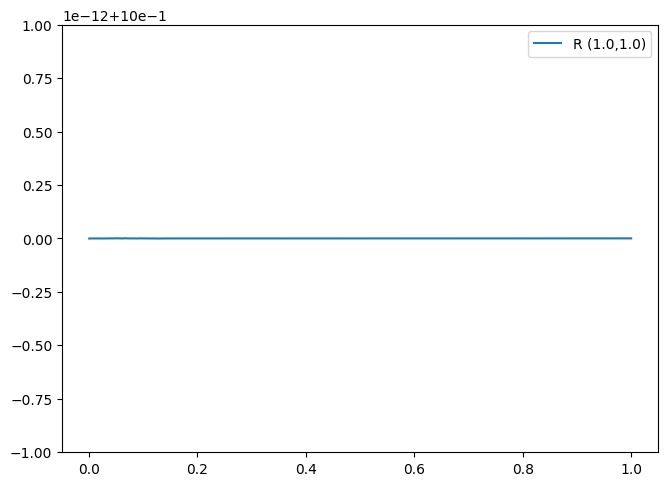

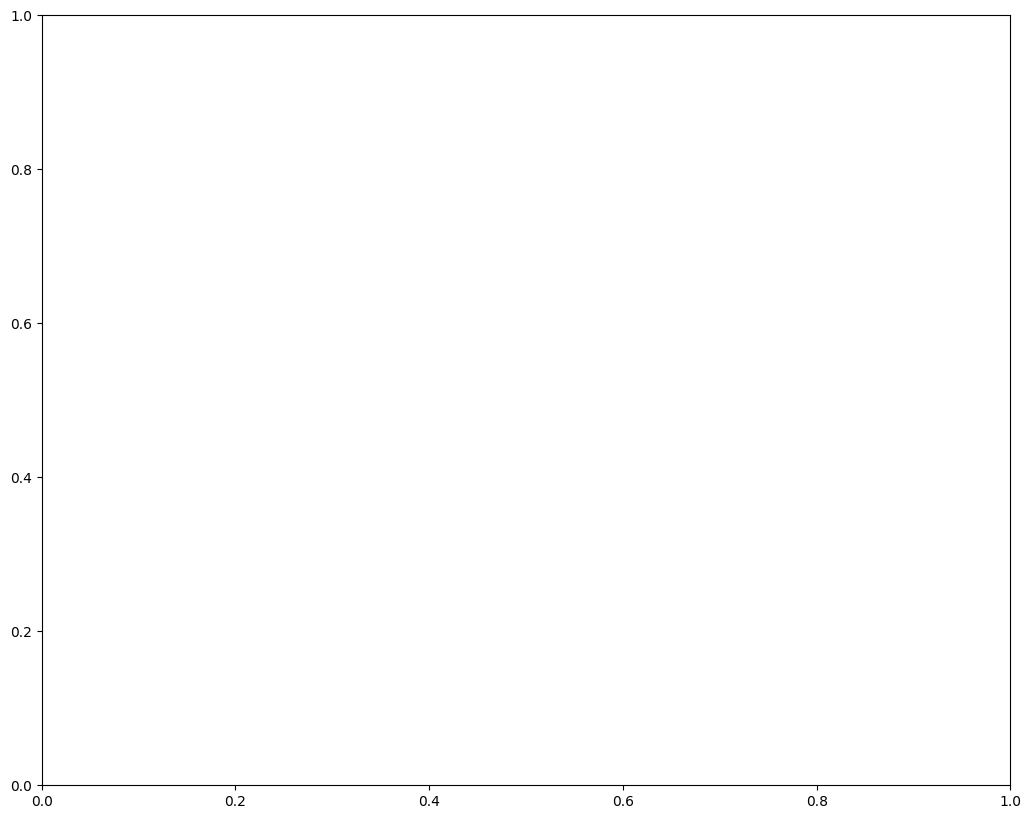

In [14]:
fig = plt.figure(figsize=(40, 60))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
cnt=1
for i in range(0,30,2):
    ax = fig.add_subplot(8, 4, cnt)
    g = plot_posteriors(*data[i][1:],ax,"after "+str(i)+" runs")
    cnt+=1
plt.show()

In [ ]:
for i,x in enumerate(data[1:]):
    print("Pick",i+1,":",x[0],end=" ,")

In [ ]:
from collections import Counter
Counter([x[0] for x in data[1:]])

In [ ]:
fig = plt.figure(figsize=(12.5, 5))
sns.set(style="ticks")
sns.barplot(x=['R','G','B'],y=[42,5,3],palette=['R','G','B'],alpha=0.3)
sns.despine()